In [38]:
import pandas as pd
import json
import vincent
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import re
import seaborn as sns
import numpy as np
import folium
from folium.plugins import HeatMap
from shapely.geometry import Polygon
from pykml import parser
import os
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

In [39]:
fuel_df = pd.read_csv('alt_fuel_stations (Jul 29 2021).csv')
fuel_df.head()

/var/folders/ly/6s9xls1s5k92nhwz4573k3vm0000gp/T/ipykernel_58336/2859254457.py:1: DtypeWarning: Columns (3,6,10,13,14,15,16,20,29,31,33,34,35,36,43,45,46,47,49,52,53,54,56,57,58,59,60,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  fuel_df = pd.read_csv('alt_fuel_stations (Jul 29 2021).csv')


Fuel Type Cotion Directions  \
0                         CNG   
1                         CNG   
2                         CNG   
3                         CNG   
4                         CNG   

                                                City                 State  \
0               Spire - Montgomery Operations Center      2951 Chestnut St   
1                                PS Energy - Atlanta      340 Whitehall St   
2       Metropolitan Atlanta Rapid Transit Authority   2424 Piedmont Rd NE   
3                              United Parcel Service  270 Marvin Miller Dr   
4  Clean Energy - Texas Department of Transportation   7721A Washington St   

                                                 ZIP       Plus4  \
0                                                NaN  Montgomery   
1  From I-7585 N, exit 91 to Central Ave, left on...     Atlanta   
2                                                NaN     Atlanta   
3                                                NaN     Atlanta   
4  I-10, Washington Ave exit, 1.5 blocks to the s...     Houston   

  Station Phone Status Code  Expected Date Groups With Access Code  \
0            AL       36107            NaN                     NaN   
1            GA       30303            NaN            770-350-3000   
2            GA       30324            NaN                     NaN   
3            GA       30336            NaN                     NaN   
4            TX       77007            NaN            866-809-4869   

  Access Days Time  ... Hydrogen Standards CNG Fill Type Code CNG PSI  \
0                E  ...                NaN                NaN     NaN   
1                E  ...                NaN                NaN     NaN   
2                E  ...                NaN                NaN     NaN   
3                E  ...                NaN                NaN     NaN   
4                E  ...                NaN                NaN     NaN   

  CNG Vehicle Class LNG Vehicle Class EV On-Site Renewable Source  \
0               NaN                 B                        3600   
1               NaN                 Q                        3600   
2               NaN                 Q                        3000   
3               NaN                 B                        3600   
4               NaN                 Q                   3000 3600   

  Restricted Accessde  Station Name  Street Address  Intersec  
0                  MD           NaN             NaN       NaN  
1                  MD           NaN             NaN       NaN  
2                  LD           NaN             NaN       NaN  
3                  HD           NaN             NaN       NaN  
4                  MD           NaN             NaN       NaN  

[5 rows x 65 columns]

In [40]:
#Cleaning the Data
#Identify the columns to keep from original df
columns_to_keep = ['City', 'ID', 'Updated At', 'Fuel Type Cotion Directions','LPG Primary', 'Plus4', 'State', 'Station Phone']  

# Select only the specified columns
cleaned_df = fuel_df[columns_to_keep]
    
# Print the DataFrame with selected columns
cleaned_df.sample(15)
type(cleaned_df['City'])
type(cleaned_df['Updated At'])

# I need to remake new columns to make the DF easier to understand
cleaned_df['lat'] = cleaned_df['ID']
cleaned_df['lon'] = cleaned_df['Updated At']
cleaned_df['Address'] = cleaned_df['State']
cleaned_df['Station_Name'] = cleaned_df['City']
cleaned_df['Fuel Type'] = cleaned_df['Fuel Type Cotion Directions']
cleaned_df['City'] = cleaned_df['Plus4']
cleaned_df['States'] = cleaned_df['Station Phone']
cleaned_df['Created_Date'] = cleaned_df['LPG Primary']

cleaned_df.head(10)

/var/folders/ly/6s9xls1s5k92nhwz4573k3vm0000gp/T/ipykernel_58336/3062709961.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['lat'] = cleaned_df['ID']
/var/folders/ly/6s9xls1s5k92nhwz4573k3vm0000gp/T/ipykernel_58336/3062709961.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['lon'] = cleaned_df['Updated At']
/var/folders/ly/6s9xls1s5k92nhwz4573k3vm0000gp/T/ipykernel_58336/3062709961.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

City         ID  Updated At Fuel Type Cotion Directions LPG Primary  \
0   Montgomery  32.367916  -86.267021                         CNG  2010-12-01   
1      Atlanta  33.745843  -84.398837                         CNG  1994-07-15   
2      Atlanta  33.821911  -84.367461                         CNG  1996-12-15   
3      Atlanta  33.760256  -84.543822                         CNG  1997-01-01   
4      Houston  29.779918  -95.435385                         CNG  1996-12-15   
5   Fort Smith  35.362213  -94.375338                         CNG  1997-01-01   
6  East Boston  42.374706  -71.026549                         CNG  1996-11-15   
7      Everett  42.393167  -71.064352                         CNG  1996-11-15   
8     Brooklyn  40.718037  -73.932309                         CNG  2016-07-15   
9     Brooklyn  40.645540  -73.918344                         CNG  1988-01-15   

         Plus4                 State Station Phone        lat        lon  \
0   Montgomery      2951 Chestnut St            AL  32.367916 -86.267021   
1      Atlanta      340 Whitehall St            GA  33.745843 -84.398837   
2      Atlanta   2424 Piedmont Rd NE            GA  33.821911 -84.367461   
3      Atlanta  270 Marvin Miller Dr            GA  33.760256 -84.543822   
4      Houston   7721A Washington St            TX  29.779918 -95.435385   
5   Fort Smith     2100 S Waldron Rd            AR  35.362213 -94.375338   
6  East Boston   1000 Cottage St Ext            MA  42.374706 -71.026549   
7      Everett           16 Rover St            MA  42.393167 -71.064352   
8     Brooklyn       287 Maspeth Ave            NY  40.718037 -73.932309   
9     Brooklyn       8424 Ditmas Ave            NY  40.645540 -73.918344   

                Address                                       Station_Name  \
0      2951 Chestnut St               Spire - Montgomery Operations Center   
1      340 Whitehall St                                PS Energy - Atlanta   
2   2424 Piedmont Rd NE       Metropolitan Atlanta Rapid Transit Authority   
3  270 Marvin Miller Dr                              United Parcel Service   
4   7721A Washington St  Clean Energy - Texas Department of Transportation   
5     2100 S Waldron Rd                         Arkansas Oklahoma Gas Corp   
6   1000 Cottage St Ext         Clean Energy - Logan International Airport   
7           16 Rover St             Clean Energy - Everett - National Grid   
8       287 Maspeth Ave          Clean Energy - Greenpoint - National Grid   
9       8424 Ditmas Ave                           Canarsie - National Grid   

  Fuel Type States Created_Date  
0       CNG     AL   2010-12-01  
1       CNG     GA   1994-07-15  
2       CNG     GA   1996-12-15  
3       CNG     GA   1997-01-01  
4       CNG     TX   1996-12-15  
5       CNG     AR   1997-01-01  
6       CNG     MA   1996-11-15  
7       CNG     MA   1996-11-15  
8       CNG     NY   2016-07-15  
9       CNG     NY   1988-01-15

In [41]:
columns_to_drop = ['ID', 'Updated At', 'Plus4', 'Fuel Type Cotion Directions','State','Station Phone', 'LPG Primary']
cleaned_df.drop(columns=columns_to_drop, inplace=True)
final_fuel_df = pd.DataFrame(cleaned_df)
final_fuel_df['geometry'] = final_fuel_df.apply(lambda row: Point(row['lon'], row['lat']), axis=1)

final_fuel_df.to_csv('Final_Fuel_Stats')
final_fuel_df.head()

/var/folders/ly/6s9xls1s5k92nhwz4573k3vm0000gp/T/ipykernel_58336/1800680175.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.drop(columns=columns_to_drop, inplace=True)
/Users/brandoncooke/anaconda3/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:130: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


City        lat        lon               Address  \
0  Montgomery  32.367916 -86.267021      2951 Chestnut St   
1     Atlanta  33.745843 -84.398837      340 Whitehall St   
2     Atlanta  33.821911 -84.367461   2424 Piedmont Rd NE   
3     Atlanta  33.760256 -84.543822  270 Marvin Miller Dr   
4     Houston  29.779918 -95.435385   7721A Washington St   

                                        Station_Name Fuel Type States  \
0               Spire - Montgomery Operations Center       CNG     AL   
1                                PS Energy - Atlanta       CNG     GA   
2       Metropolitan Atlanta Rapid Transit Authority       CNG     GA   
3                              United Parcel Service       CNG     GA   
4  Clean Energy - Texas Department of Transportation       CNG     TX   

  Created_Date                      geometry  
0   2010-12-01  POINT (-86.267021 32.367916)  
1   1994-07-15  POINT (-84.398837 33.745843)  
2   1996-12-15  POINT (-84.367461 33.821911)  
3   1997-01-01  POINT (-84.543822 33.760256)  
4   1996-12-15  POINT (-95.435385 29.779918)

In [42]:

#Lets begin the exploratory data analysis.This will calculate summary statistics including count, 
# mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 
# 75th percentile (Q3), and maximum for the 'lat' and 'lon' columns.

summary_stats = final_fuel_df[['lat', 'lon']].describe()
summary_stats

lat           lon
count  56800.000000  56800.000000
mean      37.722248    -97.909296
std        5.018685     18.978957
min       18.334138   -159.585878
25%       34.023635   -118.107212
50%       37.985945    -94.586555
75%       41.344965    -81.027758
max       64.200841      0.000000

In [43]:
mean_latitude = final_fuel_df['lat'].mean()

# Standard deviation of longitude
std_longitude = final_fuel_df['lon'].std()

# Minimum longitude
min_longitude = final_fuel_df['lon'].min()

# Maximum latitude
max_latitude = final_fuel_df['lat'].max()

print("Mean Latitude:", mean_latitude)
print("Std Longitude:", std_longitude)
print("Min Longitude:", min_longitude)
print("Max Latitude:", max_latitude)

Mean Latitude: 37.72224835742171
Std Longitude: 18.978957306550353
Min Longitude: -159.585878
Max Latitude: 64.2008413


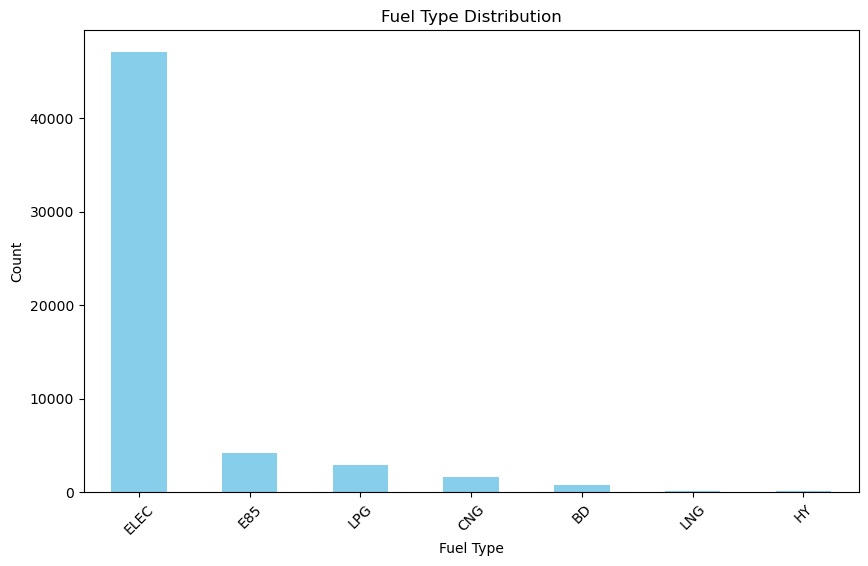

In [44]:
#Visualization with a bar chart to explore differnt fuel types
fuel_type_counts = final_fuel_df['Fuel Type'].value_counts()
plt.figure(figsize=(10, 6))
fuel_type_counts.plot(kind='bar', color='skyblue')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


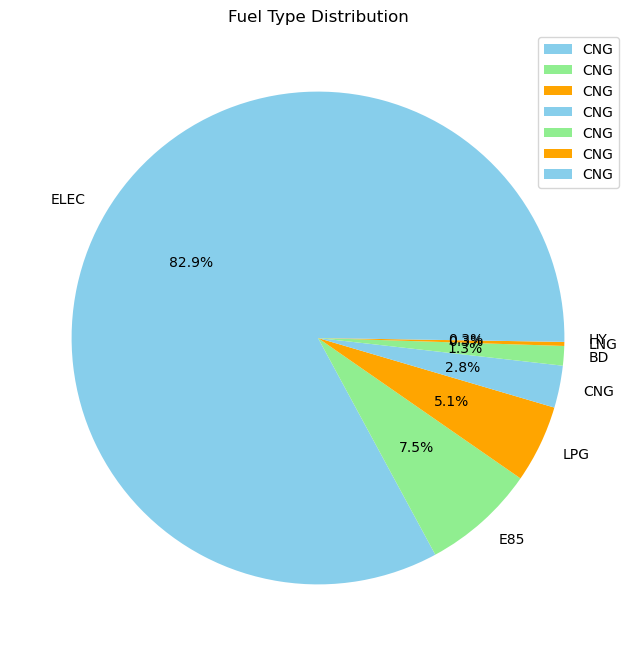

In [45]:
#Pie chart
plt.figure(figsize=(8, 8))
fuel_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange'])
plt.title('Fuel Type Distribution')
plt.legend(final_fuel_df['Fuel Type'])
plt.ylabel('')
plt.show()


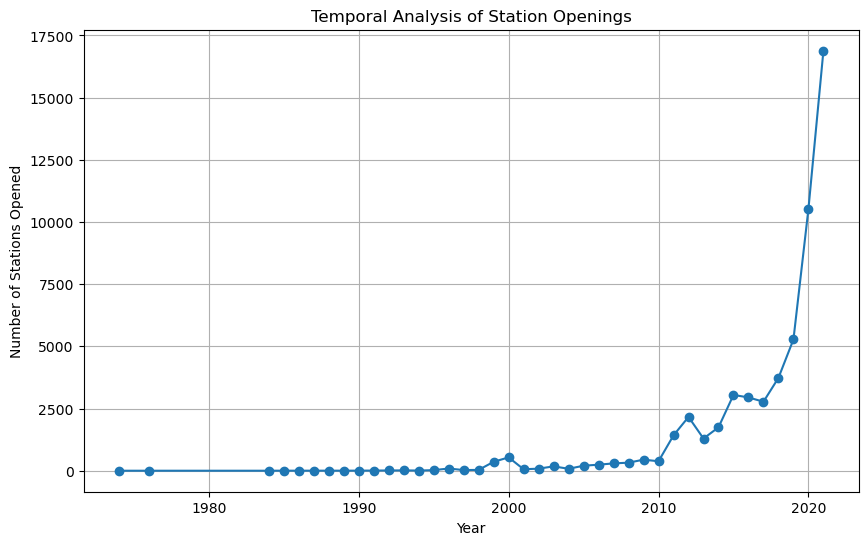

In [46]:
#temporal analysis of stations created throughout by Year:

final_fuel_df['Created_Date'] = pd.to_datetime(final_fuel_df['Created_Date'])

# Extract year from 'Created_Date'
final_fuel_df['Year'] = final_fuel_df['Created_Date'].dt.year

# Grouping the data by year and counting the number of stations opened each year
station_openings = final_fuel_df.groupby('Year').size()

# Plotting a line plot
plt.figure(figsize=(10, 6))
plt.plot(station_openings.index, station_openings.values, marker='o', linestyle='-')
plt.title('Temporal Analysis of Station Openings')
plt.xlabel('Year')
plt.ylabel('Number of Stations Opened')
plt.grid(True)
plt.show()


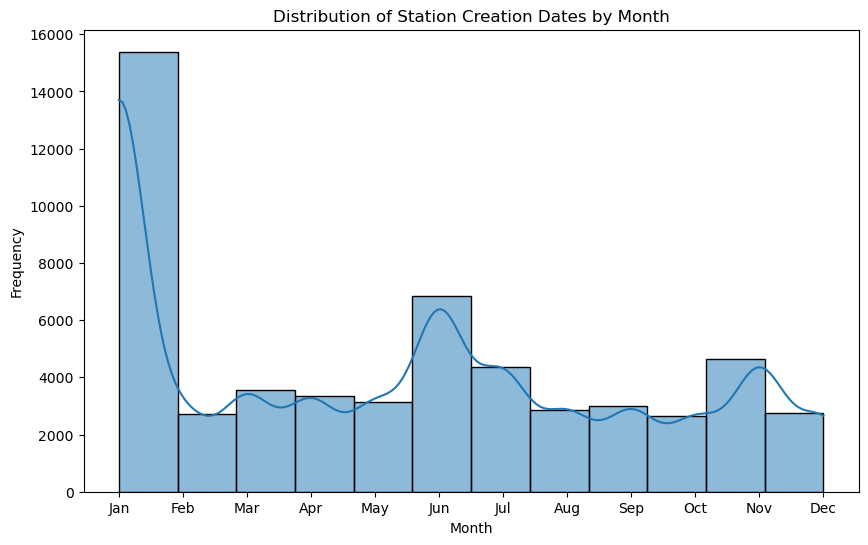

In [47]:
# Extract month from 'Created_Date' column
final_fuel_df['Month'] = final_fuel_df['Created_Date'].dt.month

# Distribution of station creation dates by month
plt.figure(figsize=(10, 6))
sns.histplot(data=final_fuel_df, x='Month', bins=12, kde=True)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Distribution of Station Creation Dates by Month')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


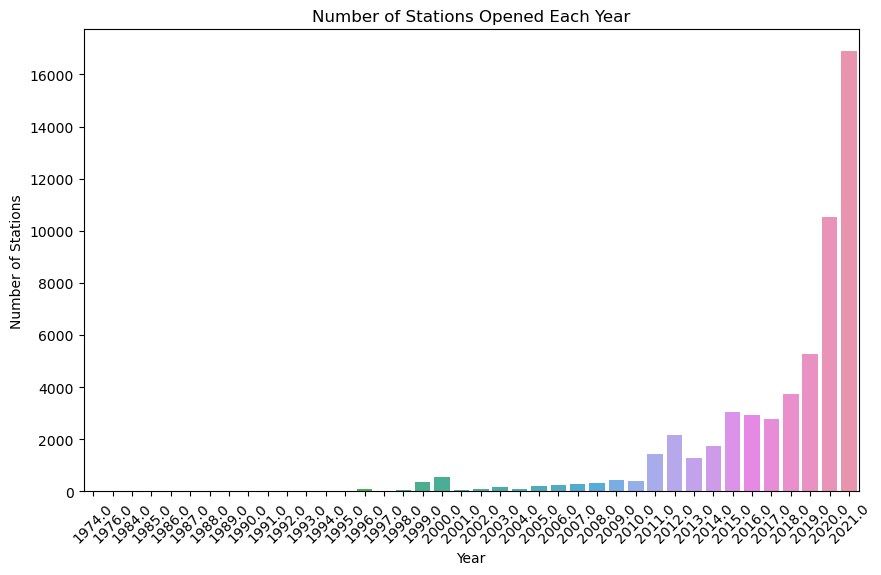

In [48]:
# Distribution of station creation dates by year
plt.figure(figsize=(10, 6))
sns.countplot(data=final_fuel_df, x='Year')
plt.xlabel('Year')
plt.ylabel('Number of Stations')
plt.title('Number of Stations Opened Each Year')
plt.xticks(rotation=45)
plt.show()


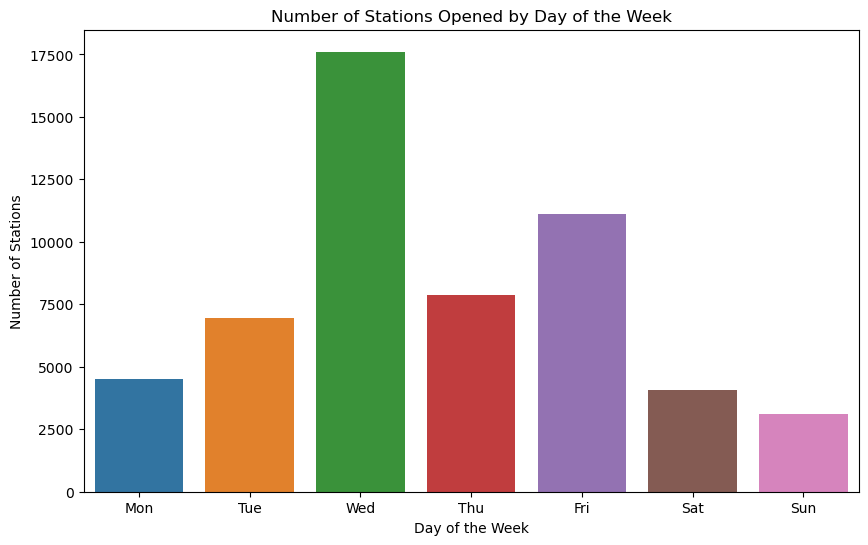

In [49]:
# Extract day of the week from 'Created_Date' column
final_fuel_df['Day_of_Week'] = final_fuel_df['Created_Date'].dt.dayofweek

# Distribution of station creation dates by day of the week
plt.figure(figsize=(10, 6))
sns.countplot(data=final_fuel_df, x='Day_of_Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Stations')
plt.title('Number of Stations Opened by Day of the Week')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()


In [50]:
final_fuel_df.head()

City        lat        lon               Address  \
0  Montgomery  32.367916 -86.267021      2951 Chestnut St   
1     Atlanta  33.745843 -84.398837      340 Whitehall St   
2     Atlanta  33.821911 -84.367461   2424 Piedmont Rd NE   
3     Atlanta  33.760256 -84.543822  270 Marvin Miller Dr   
4     Houston  29.779918 -95.435385   7721A Washington St   

                                        Station_Name Fuel Type States  \
0               Spire - Montgomery Operations Center       CNG     AL   
1                                PS Energy - Atlanta       CNG     GA   
2       Metropolitan Atlanta Rapid Transit Authority       CNG     GA   
3                              United Parcel Service       CNG     GA   
4  Clean Energy - Texas Department of Transportation       CNG     TX   

  Created_Date                      geometry    Year  Month  Day_of_Week  
0   2010-12-01  POINT (-86.267021 32.367916)  2010.0   12.0          2.0  
1   1994-07-15  POINT (-84.398837 33.745843)  1994.0    7.0          4.0  
2   1996-12-15  POINT (-84.367461 33.821911)  1996.0   12.0          6.0  
3   1997-01-01  POINT (-84.543822 33.760256)  1997.0    1.0          2.0  
4   1996-12-15  POINT (-95.435385 29.779918)  1996.0   12.0          6.0

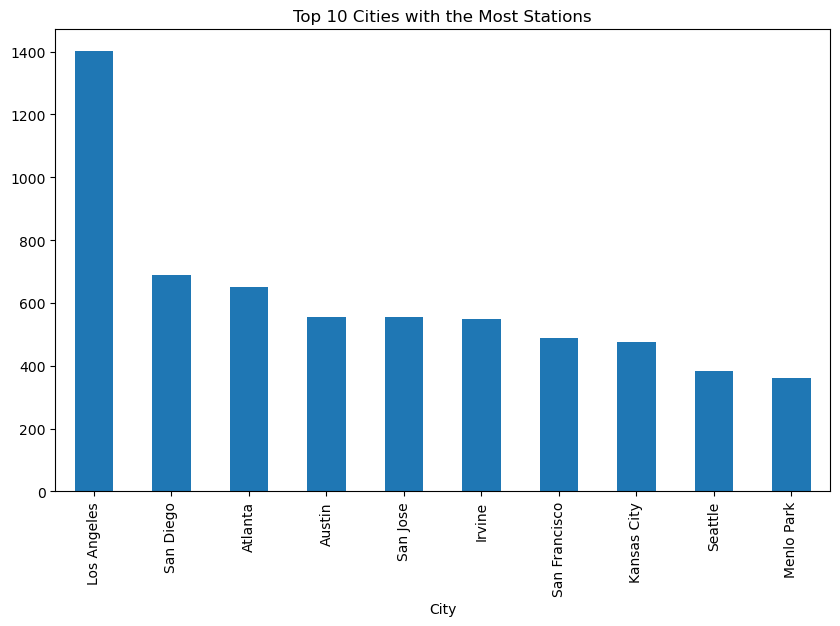

In [51]:
#Performing an address analysis and analyze the distribution of stations based on their addresses

# Split the 'Address' column to extract street names, cities, and ZIP codes
address_parts = final_fuel_df['Address']

# Assign meaningful column names to the extracted parts
address_parts.columns = ['City', 'States']

# Concatenate the extracted parts with the original DataFrame
final_fuel_df_with_address = pd.concat([final_fuel_df, address_parts], axis=1)

# Now you can analyze the distribution of stations based on street names, cities, or ZIP codes
# For example, you can use value_counts() to get the frequency of each street, city, or ZIP code

city_distribution = final_fuel_df_with_address['City'].str.strip().value_counts()
state_distribution = final_fuel_df_with_address['States'].value_counts()

# You can also visualize the distributions using matplotlib or seaborn
# For example, to plot the top 10 cities with the most stations:
city_distribution.head(10).plot(kind='bar', figsize=(10, 6), title='Top 10 Cities with the Most Stations');



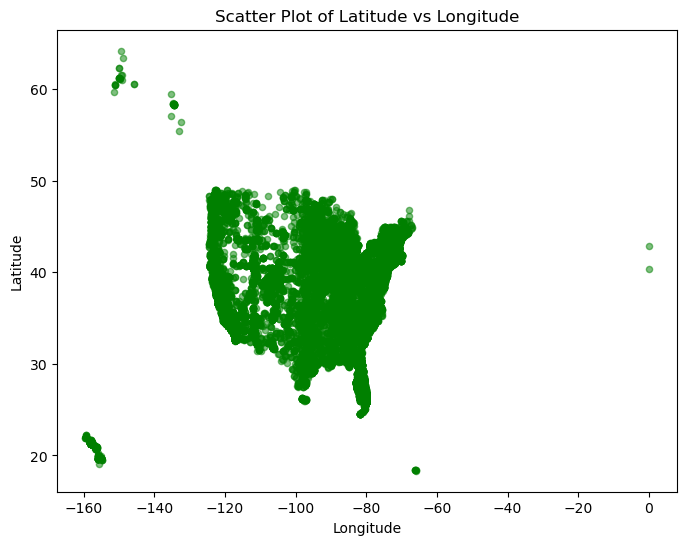

In [52]:
#Correlation Analysis based on lattitude and longitude

plt.figure(figsize=(8, 6))
plt.scatter(final_fuel_df['lon'], final_fuel_df['lat'], s=20, alpha=0.5, color = "green")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Latitude vs Longitude')
plt.show()

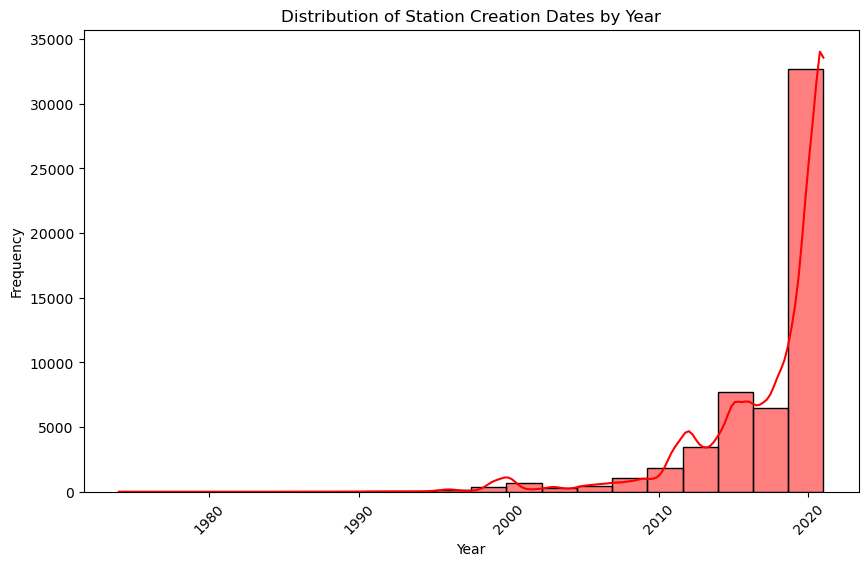

In [53]:
# Distribution of station creation dates by year
plt.figure(figsize=(10, 6))
sns.histplot(data=final_fuel_df, x='Year', bins=20, kde=True, color = "red")
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Station Creation Dates by Year')
plt.xticks(rotation=45)
plt.show()

In [54]:
#Interactive Heat map showing station density on states.

# Create a base map
#m = folium.Map(location=[37, -102], zoom_start=4)

#heat_data2 = [[row['lat'], row['lon']] for index, row in final_fuel_df.iterrows()]
#HeatMap(heat_data2).add_to(m)

#m


In [55]:
us_shapefile = 'States_shapefile.shp'
us_boundary2 = gpd.read_file(us_shapefile)
us_boundary2 = us_boundary2.to_json()

heatmap_data = final_fuel_df[['lat', 'lon']]

# Create a GeoDataFrame from the heatmap_data
heat_data = gpd.GeoDataFrame(geometry=gpd.points_from_xy(heatmap_data['lon'], heatmap_data['lat']), crs='EPSG:4326')

# Create Folium Map
m2 = folium.Map(location=[37, -102], zoom_start=4)

heat_map = HeatMap(heatmap_data,
                   min_opacity=0.5,
                   max_val=0.5,
                   radius=15,
                   blur=10,tooltip=['Station_Name'],
                   max_zoom=1)

#for idx, row in final_fuel_df.iterrows():
    #folium.Marker([row['lat'], row['lon']], popup=row['Station_Name']).add_to(m2)

m2.add_child(heat_map)

folium.GeoJson(us_boundary2, popup = final_fuel_df['Fuel Type']).add_to(m2)

folium.LayerControl().add_to(m2)

m2

/var/folders/ly/6s9xls1s5k92nhwz4573k3vm0000gp/T/ipykernel_58336/3907572585.py:13: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  heat_map = HeatMap(heatmap_data,


In [56]:
small_fuel_df = final_fuel_df.head(1000)

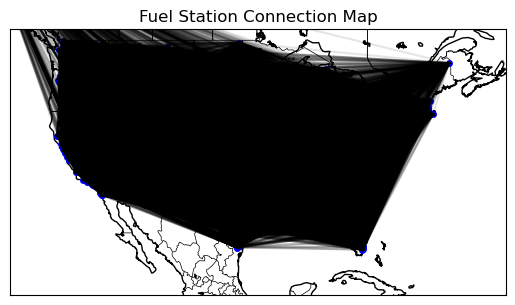

In [57]:
# Create Basemap
m = Basemap(projection='merc', llcrnrlat=20, urcrnrlat=50, llcrnrlon=-130, urcrnrlon=-60, resolution='l')

# Draw coastlines, countries, and states
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Plot stations
for idx, row in small_fuel_df.iterrows():
    x, y = m(row['lon'], row['lat'])
    m.plot(x, y, 'bo', markersize=4)

# Plot connections between stations
for i in range(len(small_fuel_df)):
    for j in range(i + 1, len(small_fuel_df)):
        x1, y1 = m(small_fuel_df.iloc[i]['lon'], small_fuel_df.iloc[i]['lat'])
        x2, y2 = m(small_fuel_df.iloc[j]['lon'], small_fuel_df.iloc[j]['lat'])
        m.plot([x1, x2], [y1, y2], 'k-', alpha=0.1)  # Adjust alpha for transparency


plt.title('Fuel Station Connection Map')
plt.show()


/Users/brandoncooke/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


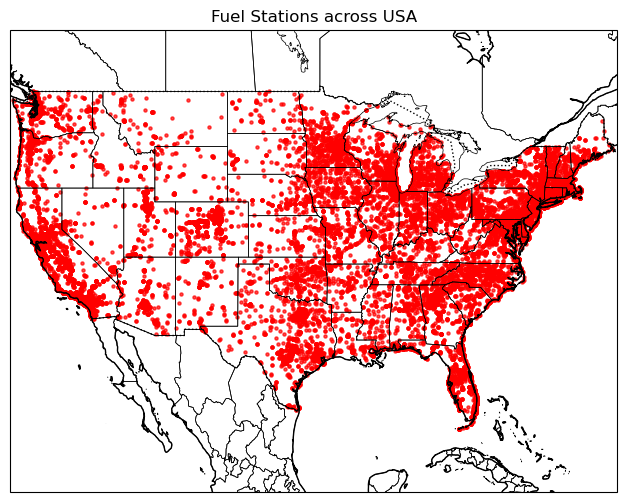

In [58]:
us_shapefile = 'States_shapefile.shp'
us_boundary = gpd.read_file(us_shapefile)

# Create a GeoDataFrame from final_fuel_df
geometry = [Point(lon, lat) for lon, lat in zip(final_fuel_df['lon'], final_fuel_df['lat'])]
crs = {'init': 'epsg:4326'}
fuel_stations = gpd.GeoDataFrame(final_fuel_df, crs=crs, geometry=geometry)

# Plot the map using Cartopy
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES.with_scale('10m'), linewidth=0.5)
ax.set_extent([-125, -66.5, 20, 50])  # Adjust the extent as needed

# Plot fuel stations
fuel_stations.plot(ax=ax, color='red', markersize=5, alpha=0.7)

plt.title('Fuel Stations across USA')
plt.show()

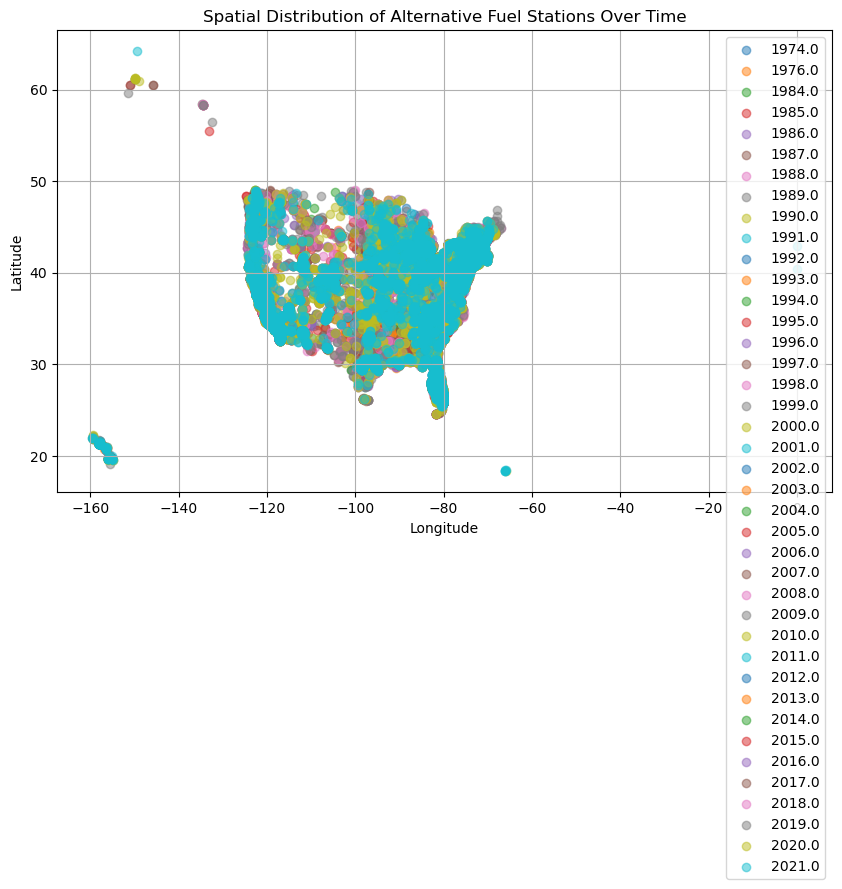

In [59]:
#Spatial Distribution of Alternative Fuel Stations Over Time

plt.figure(figsize=(10, 6))
for year, group in final_fuel_df.groupby(final_fuel_df['Year']):
    plt.scatter(group['lon'], group['lat'], label=year, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Alternative Fuel Stations Over Time')
plt.legend()
plt.grid(True)
plt.show()


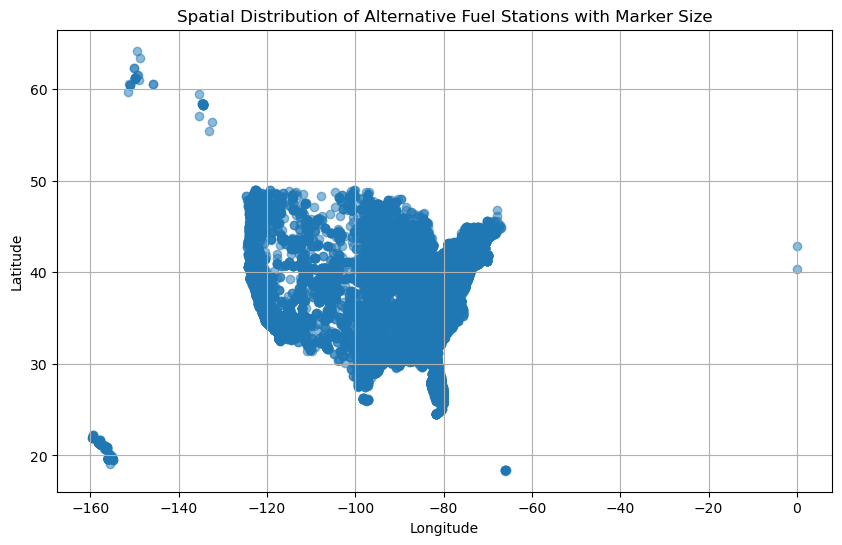

In [60]:
#Latitude vs. Longitude with Marker Size:

plt.figure(figsize=(10, 6))
# Compute marker sizes based on the entire DataFrame
marker_sizes = final_fuel_df.groupby(['lon', 'lat']).size().values * 10
plt.scatter(final_fuel_df['lon'], final_fuel_df['lat'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Spatial Distribution of Alternative Fuel Stations with Marker Size')
plt.grid(True)
plt.show()


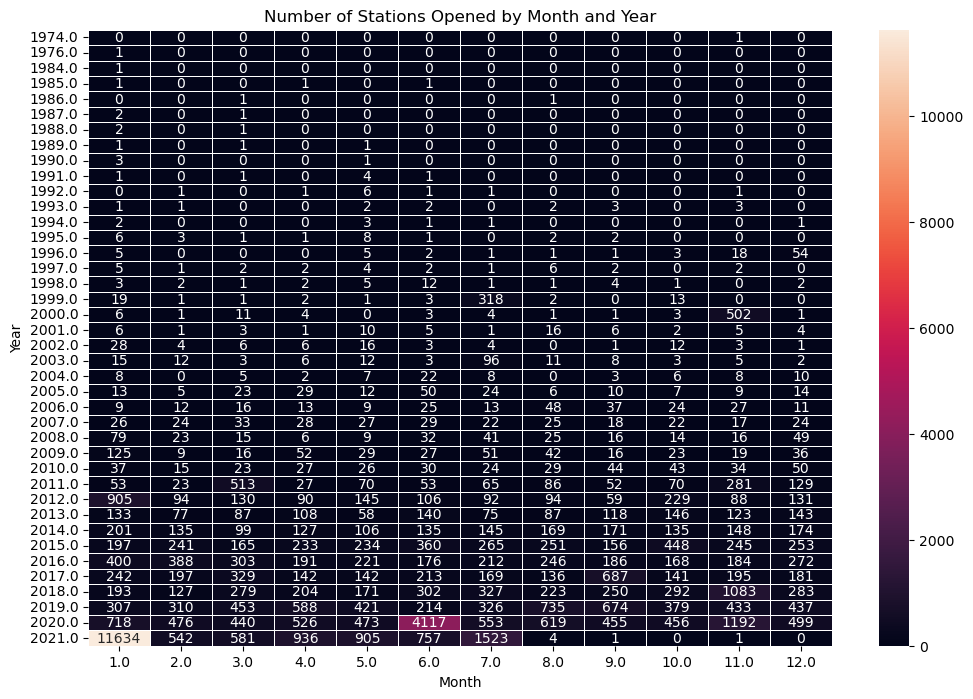

In [61]:
# Aggregate data by month and year
# This heatmap describes the number of alternative fuel stations opened by month and year. 
# Each cell in the heatmap represents the count of stations opened in a specific month of a specific 
# year. The rows represent years, and the columns represent months. The color intensity or 
# annotation within each cell indicates the count of stations opened during that month and year. 
# This visualization helps in understanding the temporal distribution of station openings over the 
# years.

final_fuel_df['Year'] = final_fuel_df['Created_Date'].dt.year
final_fuel_df['Month'] = final_fuel_df['Created_Date'].dt.month

monthly_counts = final_fuel_df.groupby(['Year', 'Month']).size().unstack()

monthly_counts = monthly_counts.fillna(0).astype(int)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_counts, annot=True, fmt='d', linewidths=.5)
plt.title('Number of Stations Opened by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [69]:
# Create a dictionary with lat and lon data
multi_iter2 = {
    "x": small_fuel_df['lon'].values,
    "y": small_fuel_df['lat'].values,
}

# Create a scatter plot using Vincent
scatter = vincent.Scatter(multi_iter2, iter_idx="x", height=100, width=200)

# Convert the scatter plot to JSON
data = json.loads(scatter.to_json())

# Create a Folium map
m3 = folium.Map([0, 0], zoom_start=1)

# Iterate through each station and add a marker with a popup
for idx, row in small_fuel_df.iterrows():
    marker = folium.Marker([row['lat'], row['lon']])
    popup = folium.Popup(row['Station_Name'])
    popup.add_to(marker)
    marker.add_to(m3)

# Display the map
m3

In [63]:
# I want to, based on trending anaylsis and proper data collection analysis, gather relevant data 
# including factors such as population density, transportation infrastructure, regulatory policies, 
# historical fuel consumption, station adoption rates, etc. would want to preform a predictive 
# model for forcasting future demands for alterantive fuels or possible predicting the likelihood of 
# station adoption

In [75]:

# Create a GeoDataFrame from final_fuel_df
final_fuel_gdf = gpd.GeoDataFrame(final_fuel_df, geometry=gpd.points_from_xy(final_fuel_df.lon, final_fuel_df.lat))

# Check for and fix any invalid geometries
invalid_geoms = final_fuel_gdf[final_fuel_gdf.geometry.is_valid == False]
if not invalid_geoms.empty:
    final_fuel_gdf = final_fuel_gdf[final_fuel_gdf.geometry.is_valid]

# Load the US states shapefile
us_states_shapefile = 'States_shapefile.shp'
us_states = gpd.read_file(us_states_shapefile)

# Merge with station data based on the geometry
merged_df = gpd.sjoin(us_states, final_fuel_gdf, how='left', op='intersects')
merged_df['City'].fillna('Unknown', inplace=True)
merged_df['States'].fillna('Unknown', inplace=True)
merged_df['timestamp_column'] = merged_df['timestamp_column'].dt.strftime('%Y-%m-%d %H:%M:%S')
# Convert merged_df to JSON
merged_df_json = merged_df.to_json()

# Create choropleth map
m = folium.Map(location=[37, -102], zoom_start=4)
folium.Choropleth(
    geo_data=us_states_shapefile,  # Use the original shapefile
    name='choropleth',
    data=merged_df_json,
    columns=['States', 'City'],  # Use the appropriate column names
    key_on='feature.properties.NAME',  # Check the structure of your shapefile for the correct key
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of Stations'
).add_to(m)

# Add layer control to toggle between map layers
folium.LayerControl().add_to(m)

# Save the map to an HTML file
m.save('state_wise_stations_map.html')


/Users/brandoncooke/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


KeyError: 'timestamp_column'

In [77]:
merged_df.head(30)

geometry  index_right  \
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...        10899   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...        50889   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...         8742   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...        13698   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...        50700   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...          719   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...         8355   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...        53444   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...        17990   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...        50326   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...         6483   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...         3875   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...        55189   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...         5101   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...         5100   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...        11136   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...        18190   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...         6482   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...          527   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...         2528   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...        48164   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...        48165   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...        36137   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...        23452   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...          265   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...        16834   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...         2524   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...         5099   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...         5098   
0  POLYGON ((-85.07007 31.98070, -85.11515 31.907...         7527   

           City        lat        lon                         Address  \
0    Huntsville  34.719604 -86.617722               3713 Governors Dr   
0     Hollywood  34.725645 -85.975204              2744 Bellefonte Rd   
0    Huntsville  34.728669 -86.585894                301 Fountain Cir   
0    Huntsville  34.732336 -86.588570                201 Jefferson st   
0    Huntsville  34.734020 -86.659957            4960 Corporate Dr NW   
0    Huntsville  34.735490 -86.637551           4400 University Dr NW   
0    Huntsville  34.735495 -86.623956           3800 University Dr NW   
0    Huntsville  34.735538 -86.624123           3800 University Dr NW   
0    Huntsville  34.735978 -86.625031           3800 University Dr NW   
0    Huntsville  34.738812 -86.677328  1100 Enterprise Way North West   
0    Huntsville  34.739536 -86.601051            905 Memorial Pkwy NW   
0       Madison  34.748585 -86.784874               8890 Highway 72 W   
0    Huntsville  34.748848 -86.691300           6520 University Dr NW   
0    Huntsville  34.748967 -86.690944           6520 University Dr NW   
0    Huntsville  34.748967 -86.690944           6520 University Dr NW   
0    Huntsville  34.751539 -86.707196                   6941 Hwy 72 W   
0    Huntsville  34.752916 -86.693007         328  Providence Main St   
0    Huntsville  34.754579 -86.713759           7131 University Dr NW   
0    Huntsville  34.773256 -86.571778                3600 Meridian St   
0    Scottsboro  34.787245 -86.120170                    128 GTE Loop   
0    Huntsville  34.840520 -86.628513             100 S Profile Place   
0    Huntsville  34.842883 -86.639223             100 S Profile Place   
0    Huntsville  34.842919 -86.639084             100 S Profile Place   
0         Toney  34.845316 -86.631549             476 Liberty Hill Rd   
0      Piedmont  33.921589 -85.620314                 702 Memorial Dr   
0     